# 4   Writing Structured Programs

# 4.1 Back to the basics 

In [2]:
empty = []
nested = [empty, empty, empty]
nested
[[], [], []]
nested[1].append('Python')
nested
[['Python'], ['Python'], ['Python']]
#Pretty cool

[['Python'], ['Python'], ['Python']]

In [3]:
nested = [[]] * 3
nested[1].append('Python')
nested[1] = ['Monty']
nested
[['Python'], ['Monty'], ['Python']]

[['Python'], ['Monty'], ['Python']]

In [4]:
#This takes the object reference 
foo = ['Monty', 'Python']
bar = foo [1]
foo[1] = 'Bodkin' [2]
bar

'Python'

In [17]:
#To check for reference code we use id()
id(bar)

1241205637448

## Conditionals 
The functions all() and any() can be applied to a list (or other sequence) to check whether all or any items meet some condition:

In [18]:
sent = ['No', 'good', 'fish', 'goes', 'anywhere', 'without', 'a', 'porpoise', '.']
all(len(w) > 4 for w in sent)

False

In [19]:
any(len(w) > 4 for w in sent)

True

Python Sequences 
$$
\begin{array}{|ll|l|}
\hline  {\text { Python Expression }} &  {\text { Comment }} \\
\text { for item in s } & \text { iterate over the items of s } \\
\text { for item in sorted(s) } & \text { iterate over the items of s in order } \\
\text { for item in set(s) } & \text { iterate over unique elements of s } \\
\text { for item in reversed(s) } & \text { iterate over elements of s in reverse } \\
\text { for item in set(s).difference(t) } & \text { iterate over elements of s not in t } \\
\hline
\end{array}
$$

## Generator Expressions

Gets ride of the list comphrension for efficency 

In [21]:
from nltk import word_tokenize
text = '''"When I use a word," Humpty Dumpty said in rather a scornful tone,
"it means just what I choose it to mean - neither more nor less."'''
[w.lower() for w in word_tokenize(text)]

['``',
 'when',
 'i',
 'use',
 'a',
 'word',
 ',',
 "''",
 'humpty',
 'dumpty',
 'said',
 'in',
 'rather',
 'a',
 'scornful',
 'tone',
 ',',
 "''",
 'it',
 'means',
 'just',
 'what',
 'i',
 'choose',
 'it',
 'to',
 'mean',
 '-',
 'neither',
 'more',
 'nor',
 'less',
 '.',
 "''"]

In [25]:
# IF we want to process this further we have a few options 
#list comprehension
max([w.lower() for w in word_tokenize(text)])

'word'

In [24]:
#generator expressions 
max(w.lower() for w in word_tokenize(text))
#Quicker, doesn't require storage for the list. 

'word'

## Coding consistency 

The python creators made a [handbook](http://www.python.org/dev/peps/pep-0008/). Lines should be no longer than 80 characters

In [ ]:
#When tryin to multiline an expression we can use () or we can 
if len(syllables) > 4 and len(syllables[2]) == 3 and \ #\tells the SVM to continue this on the next line


## Procedural vs Declarative Style

Procedural level is doing everything at a machine level. IE: 


In [26]:
import nltk.corpus
tokens = nltk.corpus.brown.words(categories='news')
count = 0
total = 0
for token in tokens:
    count += 1
    total += len(token)

While Declarative style is:


In [27]:
total = sum(len(t) for t in tokens)
print(total / len(tokens))

4.401545438271973


## Restricting functions 


In [ ]:
def tag(word):
    assert isinstance(word, basestring), "argument to tag() must be a string"
    if word in ['a', 'the', 'all']:
        return 'det'
     else:
        return 'noun'

## Documenting in python

- Use triple quotes to begin documentation
- Use a one-liner to summarize the purpose. 
- after that, one complete sentence per line 
- Use ':' to begin parameters, types, etc. 

In [ ]:
def accuracy(reference, test):
    """
    Calculate the fraction of test items that equal the corresponding reference items.

    Given a list of reference values and a corresponding list of test values,
    return the fraction of corresponding values that are equal.
    In particular, return the fraction of indexes
    {0<i<=len(test)} such that C{test[i] == reference[i]}.

        >>> accuracy(['ADJ', 'N', 'V', 'N'], ['N', 'N', 'V', 'ADJ'])
        0.5

    :param reference: An ordered list of reference values
    :type reference: list
    :param test: A list of values to compare against the corresponding
        reference values
    :type test: list
    :return: the accuracy score
    :rtype: float
    :raises ValueError: If reference and length do not have the same length
    """

    if len(reference) != len(test):
        raise ValueError("Lists must have the same length.")
    num_correct = 0
    for x, y in zip(reference, test):
        if x == y:
            num_correct += 1
    return float(num_correct) / len(reference)

# 4.5 Doing more with functions 


In [30]:
sent = ['Take', 'care', 'of', 'the', 'sense', ',', 'and', 'the',
        'sounds', 'will', 'take', 'care', 'of', 'themselves', '.']
def extract_property(prop):
    return [prop(word) for word in sent]
#Gets the length of each word 
extract_property(len)

[4, 4, 2, 3, 5, 1, 3, 3, 6, 4, 4, 4, 2, 10, 1]

In [31]:
def last_letter(word):
    return word[-1]
extract_property(last_letter)

['e', 'e', 'f', 'e', 'e', ',', 'd', 'e', 's', 'l', 'e', 'e', 'f', 's', '.']

- Notice that parentheses are only used after a function name if we are invoking the function; when we are simply treating the function as an object these are omitted.

Python provides us with one more way to define functions as arguments to other functions, so-called **lambda expressions**. Supposing there was no need to use the above last_letter() function in multiple places, and thus no need to give it a name. We can equivalently write the following:

In [32]:
extract_property(lambda w: w[-1])

['e', 'e', 'f', 'e', 'e', ',', 'd', 'e', 's', 'l', 'e', 'e', 'f', 's', '.']

## Accumulation Functions 

- Search 2: The first time this function is called, it gets as far as the yield statement and pauses. The calling program gets the first word and does any necessary processing. Once the calling program is ready for another word, execution of the function is continued from where it stopped, until the next time it encounters a yield statement. This approach is typically more efficient, as the function only generates the data as it is required by the calling program, and does not need to allocate additional memory to store the output

- Yield: goes into the print statement and does that, rather than save the word in memory. 

In [38]:
def search1(substring, words):
    result = []
    for word in words:
        if substring in word:
            result.append(word)
    return result

def search2(substring, words):
    for word in words:
        if substring in word:
            yield word

In [39]:
for item in search1('zz', nltk.corpus.brown.words()):
    print(item, end=" ")

Grizzlies' fizzled Rizzuto huzzahs dazzler jazz Pezza Pezza Pezza embezzling embezzlement pizza jazz Ozzie nozzle drizzly puzzle puzzle dazzling Sizzling guzzle puzzles dazzling jazz jazz Jazz jazz Jazz jazz jazz Jazz jazz jazz jazz Jazz jazz dizzy jazz Jazz puzzler jazz jazzmen jazz jazz Jazz Jazz Jazz jazz Jazz jazz jazz jazz Jazz jazz jazz jazz jazz jazz jazz jazz jazz jazz Jazz Jazz jazz jazz nozzles nozzle puzzle buzz puzzle blizzard blizzard sizzling puzzled puzzle puzzle muzzle muzzle muezzin blizzard Neo-Jazz jazz muzzle piazzas puzzles puzzles embezzle buzzed snazzy buzzes puzzled puzzled muzzle whizzing jazz Belshazzar Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie's Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie blizzard blizzards blizzard blizzard fuzzy Lazzeri Piazza piazza palazzi Piazza Piazza Palazzo Palazzo Palazzo Piazza Piazza Palazzo palazzo palazzo Palazzo Palazzo Piazza piazza piazza piazza Piazza Piazza Palazzo palazzo Piazza piazz

In [40]:
for item in search2('zz', nltk.corpus.brown.words()):
    print(item, end=" ")

Grizzlies' fizzled Rizzuto huzzahs dazzler jazz Pezza Pezza Pezza embezzling embezzlement pizza jazz Ozzie nozzle drizzly puzzle puzzle dazzling Sizzling guzzle puzzles dazzling jazz jazz Jazz jazz Jazz jazz jazz Jazz jazz jazz jazz Jazz jazz dizzy jazz Jazz puzzler jazz jazzmen jazz jazz Jazz Jazz Jazz jazz Jazz jazz jazz jazz Jazz jazz jazz jazz jazz jazz jazz jazz jazz jazz Jazz Jazz jazz jazz nozzles nozzle puzzle buzz puzzle blizzard blizzard sizzling puzzled puzzle puzzle muzzle muzzle muezzin blizzard Neo-Jazz jazz muzzle piazzas puzzles puzzles embezzle buzzed snazzy buzzes puzzled puzzled muzzle whizzing jazz Belshazzar Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie's Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie blizzard blizzards blizzard blizzard fuzzy Lazzeri Piazza piazza palazzi Piazza Piazza Palazzo Palazzo Palazzo Piazza Piazza Palazzo palazzo palazzo Palazzo Palazzo Piazza piazza piazza piazza Piazza Piazza Palazzo palazzo Piazza piazz

# Higher Order Functions 

First, we use this function as the first parameter of filter(), which applies the function to each item in the sequence contained in its second parameter, and only retains the items for which the function returns True.

In [41]:
def is_content_word(word):
    return word.lower() not in ['a', 'of', 'the', 'and', 'will', ',', '.']
sent = ['Take', 'care', 'of', 'the', 'sense', ',', 'and', 'the',
        'sounds', 'will', 'take', 'care', 'of', 'themselves', '.']
list(filter(is_content_word, sent))

['Take', 'care', 'sense', 'sounds', 'take', 'care', 'themselves']

In [43]:
#Which is the same as 
[w for w in sent if is_content_word(w)]

['Take', 'care', 'sense', 'sounds', 'take', 'care', 'themselves']

In [44]:
#Or we can use map to apply a function to each word.
lengths = list(map(len, nltk.corpus.brown.sents(categories='news')))
sum(lengths) / len(lengths)

21.75081116158339

In [63]:
sent = nltk.corpus.brown.sents(categories='news')

In [64]:
# We can also use a lambda function rather than an in memory function 
list(map(lambda w: len( filter(lambda c: c.lower() in "aeiou", w) ), sent) )
#Idk why this one won't word 

TypeError: object of type 'filter' has no len()

## Named Arguments

When there are a lot of parameters it is easy to get confused about the correct order. Instead we can refer to parameters by name, and even assign them a default value just in case one was not provided by the calling program. Now the parameters can be specified in any order, and can be omitted.



In [65]:

>>> def repeat(msg='<empty>', num=1):
...     return msg * num
>>> repeat(num=3)

'<empty><empty><empty>'

- These are called **keyword arguments**. If we mix these two kinds of parameters, then we must ensure that the unnamed parameters precede the named ones.

- We can define a function that takes an arbitrary number of unnamed and named parameters, and access them via an in-place list of arguments * **arg**s and an "in-place dictionary" of keyword arguments ** **kwargs**.

In [66]:
def generic(*args, **kwargs):
...     print(args)
...     print(kwargs)
...
>>> generic(1, "African swallow", monty="python")

(1, 'African swallow')
{'monty': 'python'}


In [69]:
# We'll use the variable name *song to demonstrate that there's nothing special about the name *args.

song = [['four', 'calling', 'birds'],
        ['three', 'French', 'hens'],
        ['two', 'turtle', 'doves']]
list(zip(song[0], song[1], song[2]))

[('four', 'three', 'two'),
 ('calling', 'French', 'turtle'),
 ('birds', 'hens', 'doves')]

In [ ]:
list(zip(*song))

- It should be clear from the above example that typing *song is just a convenient shorthand, and equivalent to typing out song[0], song[1], song[2].

# Structure of a Python Module 

- When you start writing Python modules, it helps to have some examples to emulate. You can locate the code for any NLTK module on your system using the __ file __ variable

In [5]:
nltk.metrics.__file__

'C:\\Users\\JungleBook\\Anaconda3\\lib\\site-packages\\nltk\\translate\\metrics.py'

- This returns the location of the compiled .pyc file for the module, and you'll probably see a different location on your machine. The file that you will need to open is the corresponding .py source file, and this will be in the same directory as the .pyc file. 

In [12]:
#If we run into a not ennough format arguments excpetion, we can use parenthises to fix them.
("%s.%s.%02d" %( "ph.d.", "n", 1))

'ph.d..n.01'

In [14]:
def find_words(text, wordlength, result=[]):
    for word in text:
        if len(word) == wordlength:
            result.append(word)
    return result

find_words(['omg', 'teh', 'lolcat', 'sitted', 'on', 'teh', 'mat'], 3)

['omg', 'teh', 'teh', 'mat']

In [15]:
find_words(['omg', 'teh', 'lolcat', 'sitted', 'on', 'teh', 'mat'], 2, ['ur'])

['ur', 'on']

In [16]:
find_words(['omg', 'teh', 'lolcat', 'sitted', 'on', 'teh', 'mat'], 3)


['omg', 'teh', 'teh', 'mat', 'omg', 'teh', 'teh', 'mat']

We use the same parameters as in the first, but we get a different result! Each time we call find_words() with no third parameter, the result will simply extend the result of the previous call

# Debugging Techniques 

Since most code errors result from the programmer making incorrect assumptions, the first thing to do when you detect a bug is to **check your assumptions**. Localize the problem by adding print statements to the program, showing the value of important variables, and showing how far the program has progressed.

Python provides a debugger which allows you to monitor the execution of your program, specify line numbers where execution will stop (i.e. breakpoints), and step through sections of code and inspect the value of variables. You can invoke the debugger on your code as follows:

In [18]:
import pdb
#pdb.run('mymodule.myfunction()')

#It will present you with a prompt (Pdb) where you can type instructions to the debugger. 

- Type help to see the full list of commands. 

- Typing step (or just s) will execute the current line and stop. If the current line calls a function, it will enter the function and stop at the first line.

- Typing next (or just n) is similar, but it stops execution at the next line in the current function. 

- The break (or b) command can be used to create or list breakpoints. 

- Type continue (or c) to continue execution as far as the next breakpoint. Type the name of any variable to inspect its value.

We can use the Python debugger to locate the problem in our find_words() function. Remember that the problem arose the second time the function was called. We'll start by calling the function without using the debugger [1], using the smallest possible input. The second time, we'll call it with the debugger [2].

In [23]:
import pdb
find_words(['cat'], 3)


['omg',
 'teh',
 'teh',
 'mat',
 'omg',
 'teh',
 'teh',
 'mat',
 'cat',
 'cat',
 'dog',
 'dog',
 'cat']

In [24]:
pdb.run("find_words(['dog'], 3)")

> <string>(1)<module>()
(Pdb) step
--Call--
> <ipython-input-14-2446747100db>(1)find_words()
-> def find_words(text, wordlength, result=[]):
(Pdb) args
text = ['dog']
wordlength = 3
result = ['omg', 'teh', 'teh', 'mat', 'omg', 'teh', 'teh', 'mat', 'cat', 'cat', 'dog', 'dog', 'cat']
(Pdb) continue


-  step took us inside the function
- and args showed the values of its arguments (or parameters).

We see immediately that result has an initial value of ['cat'], and not the empty list as expected. The debugger has helped us to localize the problem, prompting us to check our understanding of Python functions.

# 4.7 Algorithm Design 

- The best known strategy is known as divide-and-conquer. We attack a problem of size n by dividing it into two problems of size n/2, solve these problems, and combine their results into a solution of the original problem. 

- We can use recursion to navigate a deeply-nested object, such as the WordNet hypernym hierarchy. Let's count the size of the hypernym hierarchy rooted at a given synset s. We'll do this by finding the size of each hyponym of s, then adding these together

In [25]:
def size1(s):
    return 1 + sum(size1(child) for child in s.hyponyms())

- A **letter trie** is a data structure that can be used for indexing a lexicon, one letter at a time. (The name is based on the word retrieval). 

For example, if trie contained a letter trie, then trie['c'] would be a smaller trie which held all words starting with c. 4.9 demonstrates the recursive process of building a trie, using Python dictionaries. To insert the word chien, we split off the c and recursively insert hien into the sub-trie trie['c']. The recursion continues until there are no letters remaining in the word, when we store the intended value.

In [26]:
def insert(trie, key, value):
    if key:
        first, rest = key[0], key[1:]
        if first not in trie:
            trie[first] = {}
        insert(trie[first], rest, value)
    else:
        trie['value'] = value

In [27]:
trie = {}
insert(trie, 'chat', 'cat')
insert(trie, 'chien', 'dog')
insert(trie, 'chair', 'flesh')
insert(trie, 'chic', 'stylish')
trie = dict(trie)               # for nicer printing
trie['c']['h']['a']['t']['value']

'cat'

In [29]:
import pprint
# The pprint module provides a capability to “pretty-print” arbitrary Python 
# data structures in a form which can be used as input to the interpreter.

In [30]:
pprint.pprint(trie, width=40)

{'c': {'h': {'a': {'i': {'r': {'value': 'flesh'}},
                   't': {'value': 'cat'}},
             'i': {'c': {'value': 'stylish'},
                   'e': {'n': {'value': 'dog'}}}}}}


# Space-Time Tradeoffs

We can sometimes significantly speed up the execution of a program by building an auxiliary data structure, such as an index

In [33]:
# Ex 4.10
import re
def raw(file):
    contents = open(file).read()
    contents = re.sub(r'<.*?>', ' ', contents)
    contents = re.sub('\s+', ' ', contents)
    return contents

def snippet(doc, term):
    text = ' '*30 + raw(doc) + ' '*30
    pos = text.index(term)
    return text[pos-30:pos+30]

print("Building Index...")
files = nltk.corpus.movie_reviews.abspaths()
idx = nltk.Index((w, f) for f in files for w in raw(f).split())

query = ''
while query != "quit":
    query = input("query> ")     # use raw_input() in Python 2
    if query in idx:
        for doc in idx[query]:
            print(snippet(doc, query))
    else:
        print("Not found")

Building Index...
query> quit
s funded by her mother . lucy quit working professionally 10
erick . i disliked that movie quite a bit , but since " prac
t disaster . babe ruth didn't quit baseball after one season
o-be fiance . i think she can quit that job and get a more r
 and rose mcgowan should just quit acting . she has no chari
and get a day job . and don't quit it .                     
 kubrick , alas , should have quit while he was ahead . this
everyone involved should have quit while they were still ahe
l die . so what does joe do ? quit his job , of course ! ! w
red " implant . he's ready to quit the biz and get a portion
hat he always recorded , they quit and become disillusioned 
 admit that i ? ? ? ve become quite the " scream " fan . no 
 again , the fact that he has quit his job to feel what it's
school reunion . he has since quit his job as a travel journ
ells one of his friends , " i quit school because i didn't l
ms , cursing off the boss and quitting his job ( " toda

- A more subtle example of a space-time tradeoff involves replacing the tokens of a corpus with integer identifiers. We create a vocabulary for the corpus, a list in which each word is stored once, then invert this list so that we can look up any word to find its identifier.



In [34]:
def preprocess(tagged_corpus):
    words = set()
    tags = set()
    for sent in tagged_corpus:
        for word, tag in sent:
            words.add(word)
            tags.add(tag)
    wm = dict((w, i) for (i, w) in enumerate(words))
    tm = dict((t, i) for (i, t) in enumerate(tags))
    return [[(wm[w], tm[t]) for (w, t) in sent] for sent in tagged_corpus]

# MatPlotLib



In [58]:
from numpy import arange
from matplotlib import pyplot

colors = 'rgbcmyk' # red, green, blue, cyan, magenta, yellow, black

def bar_chart(categories, words, counts):
    "Plot a bar chart showing counts for each word by category"
    ind = arange(len(words))
    width = 1 / (len(categories) + 1)
    bar_groups = []
    for c in range(len(categories)):
        bars = pyplot.bar(ind+c*width, counts[categories[c]], width,
                         color=colors[c % len(colors)])
        bar_groups.append(bars)
    pyplot.xticks(ind+width, words)
    pyplot.legend([b[0] for b in bar_groups], categories, loc='upper left')
    pyplot.ylabel('Frequency')
    pyplot.title('Frequency of Six Modal Verbs by Genre')
    pyplot.show()

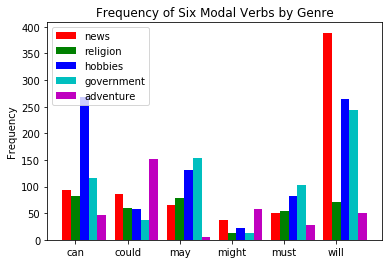

In [59]:
	
>>> genres = ['news', 'religion', 'hobbies', 'government', 'adventure']
>>> modals = ['can', 'could', 'may', 'might', 'must', 'will']
>>> cfdist = nltk.ConditionalFreqDist(
...              (genre, word)
...              for genre in genres
...              for word in nltk.corpus.brown.words(categories=genre)
...              if word in modals)
...
>>> counts = {}
>>> for genre in genres:
...     counts[genre] = [cfdist[genre][word] for word in modals]
>>> bar_chart(genres, modals, counts)

In [62]:
# It is also possible to generate such data visualizations on the fly.
#For example, a web page with form input could permit visitors to specify search parameters,
#submit the form, and see a dynamically generated visualization.

from matplotlib import use, pyplot
# To do this we have to specify the Agg backend for matplotlib, which is a library for producing raster (pixel) images 
use('Agg')

# Use all the same Matplotlib methods as before,but instead of using pyplot.show(), 
# we save it to a file using pyplot.savefig()
# specify the filename then print HTML markup that directs the web browser to load the file.
pyplot.savefig('modals.png')
print('Content-Type: text/html')
print()
print('<html><body>')
print('<img src="modals.png"/>')
print('</body></html>')

Content-Type: text/html

<html><body>
<img src="modals.png"/>
</body></html>


<Figure size 432x288 with 0 Axes>

# NetworkX

- The NetworkX package is for defining and manipulating structures consisting of nodes and edges, known as graphs. 
- NetworkX can be used in conjunction with Matplotlib to visualize networks, such as WordNet

In [66]:
import networkx as nx
import matplotlib
from nltk.corpus import wordnet as wn

def traverse(graph, start, node):
    graph.depth[node.name] = node.shortest_path_distance(start)
    for child in node.hyponyms():
        graph.add_edge(node.name, child.name) #Adds edges to the graph
        traverse(graph, start, child) #Uses divide and conquer 

def hyponym_graph(start):
    G = nx.Graph() #Initilize the empty graph 
    G.depth = {}
    traverse(G, start, start)
    return G

def graph_draw(graph):
    nx.draw_graphviz(graph,
         node_size = [16 * graph.degree(n) for n in graph],
         node_color = [graph.depth[n] for n in graph],
         with_labels = False)
    matplotlib.pyplot.show()
    
dog = wn.synset('dog.n.01')
graph = hyponym_graph(dog)
graph_draw(graph)

AttributeError: module 'networkx' has no attribute 'draw_graphviz'

# CSV

In [ ]:
import csv
input_file = open("lexicon.csv", "rb") #Open the file using python's built in file reader 
for row in csv.reader(input_file): #Iterate of the rows 
    print(row)

# Numpy 

- NLTK's clustering package nltk.cluster makes extensive use of NumPy arrays, and includes support for k-means clustering, Gaussian EM clustering, group average agglomerative clustering, and dendrogram plots. For details, type help(nltk.cluster).

# Summary 

- The "is" operation is java's (.equals), it does deep equalities. While == tests if two primative object are equivalent. 